In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

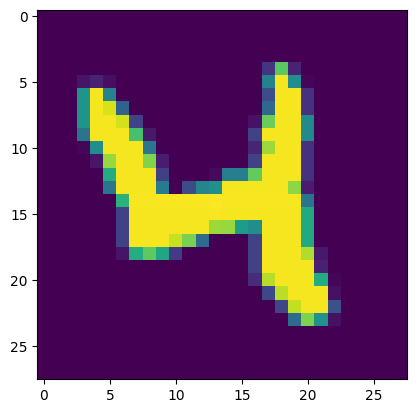

In [3]:
plt.imshow(X_train[20])

In [4]:
#Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
from tensorflow.keras import Sequential,models,layers
model = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(10,activation='sigmoid')
    
])

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,validation_data = (X_test, y_test) ,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4737 - accuracy: 0.8750 - val_loss: 0.3066 - val_accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.9160 - val_loss: 0.2823 - val_accuracy: 0.9193
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9206 - val_loss: 0.2742 - val_accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9232 - val_loss: 0.2690 - val_accuracy: 0.9252
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9257 - val_loss: 0.2696 - val_accuracy: 0.9242


In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 995us/step - loss: 0.2696 - accuracy: 0.9242


[0.26962611079216003, 0.9241999983787537]

In [10]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 881us/step


In [11]:
y_pred_digit = [np.argmax(element) for element in y_pred]

In [12]:
y_pred_digit[:10],y_test[:10]

([7, 2, 1, 0, 4, 1, 4, 9, 6, 9],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [24]:
# Using CNN
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 30, kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [25]:
cnn.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
cnn.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0364 - val_accuracy: 0.9899
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0356 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0307 - val_accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0331 - val_accuracy: 0.9918


In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9918


[0.03307492658495903, 0.9918000102043152]

In [32]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step
